In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data=df.drop(['Species','Id'],axis=1)

In [5]:
cols=list(data.columns)

In [6]:
sc=StandardScaler()
X=pd.DataFrame(sc.fit_transform(data),columns=cols)

For n_clusters = 2 The average silhouette_score is : 0.580184463257396


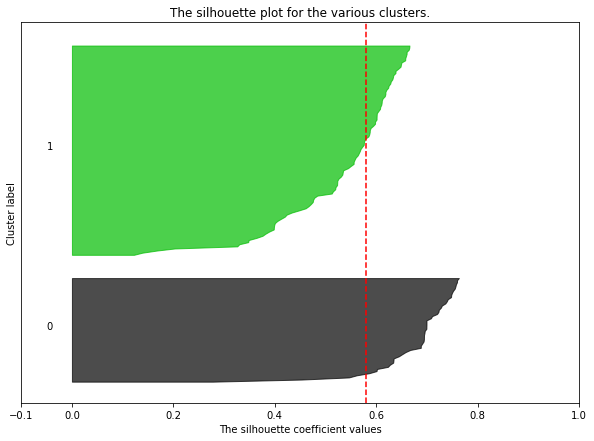

For n_clusters = 3 The average silhouette_score is : 0.46214947389312017


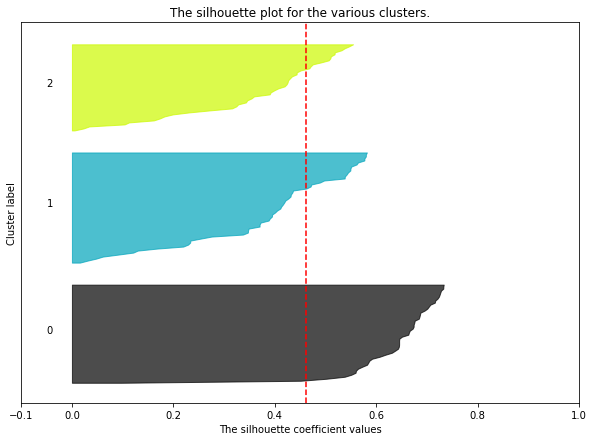

For n_clusters = 4 The average silhouette_score is : 0.38686030299599405


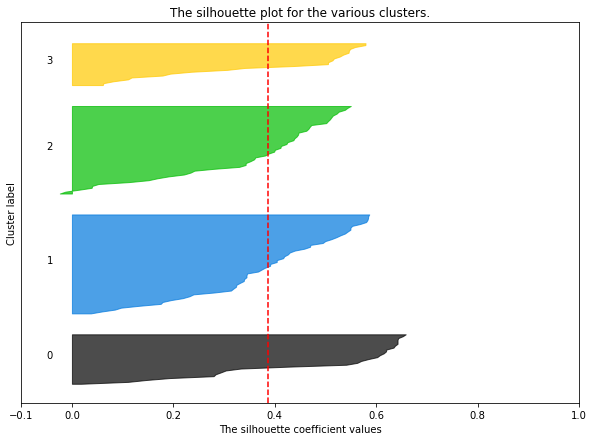

For n_clusters = 5 The average silhouette_score is : 0.34478573455929096


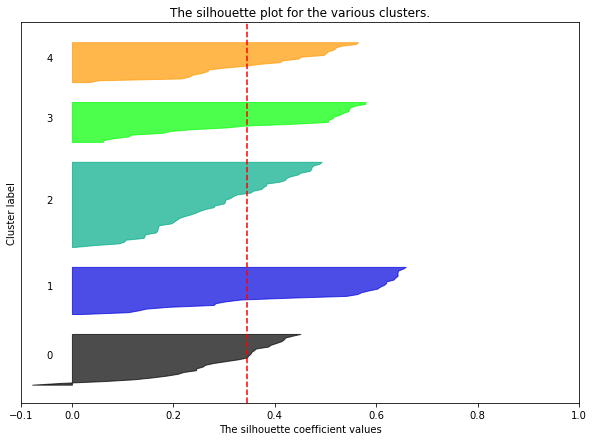

For n_clusters = 6 The average silhouette_score is : 0.3259365058730077


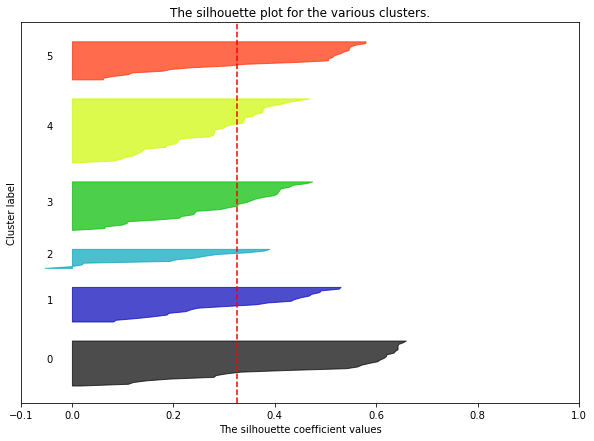

In [7]:
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

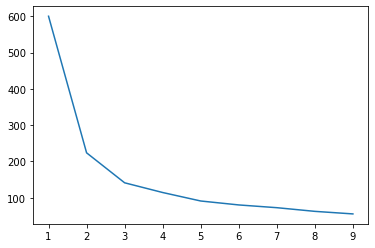

In [8]:
inertia=[]
x=[]
for i in range(1,10):
    clusterer = KMeans(n_clusters=i, random_state=10)
    clusterer.fit(X)
    inertia.append(clusterer.inertia_)
    x.append(i)
plt.plot(x,inertia)

In [9]:
df.drop('Id',axis=1,inplace=True)

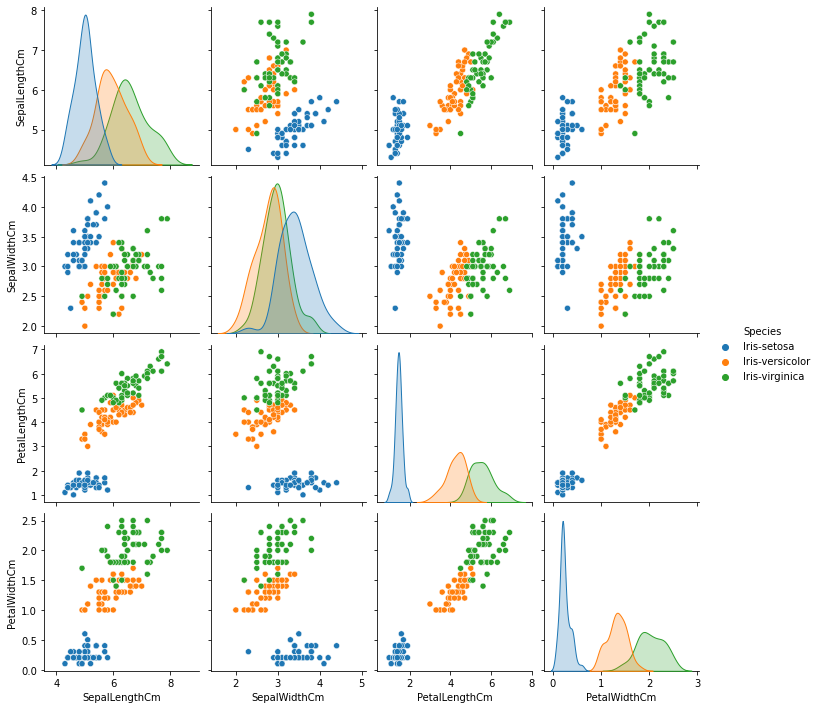

In [10]:
sns.pairplot(df,hue='Species')

In [11]:
clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels=clusterer.fit_predict(X)
final_predicted=pd.concat([pd.DataFrame(X,columns=cols),pd.Series(cluster_labels,name='Labels')],axis=1)

In [12]:
clusterer.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256]])

In [13]:
label0=final_predicted[final_predicted['Labels']==0]

In [14]:
centers=final_predicted.groupby('Labels').mean()

In [15]:
type(centers)

pandas.core.frame.DataFrame

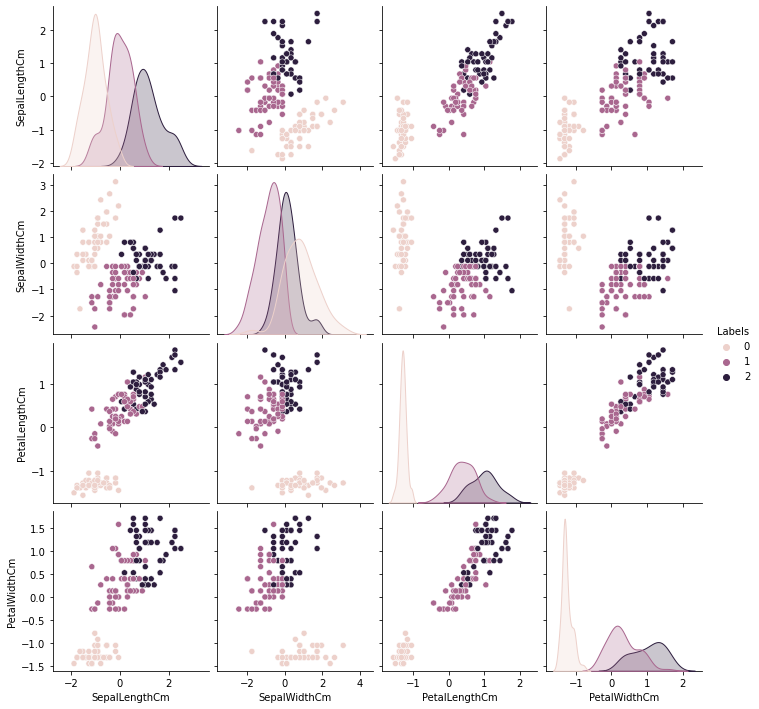

In [16]:
sns.pairplot(final_predicted,hue='Labels')

In [17]:
final_predicted['Labels']=np.where(final_predicted['Labels']==0,'Iris-setosa',final_predicted['Labels'])
final_predicted['Labels']=np.where(final_predicted['Labels']=='1','Iris-versicolor',final_predicted['Labels'])
final_predicted['Labels']=np.where(final_predicted['Labels']=='2','Iris-virginica',final_predicted['Labels'])

In [18]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [19]:
confusion_matrix(df['Species'],final_predicted['Labels'])

array([[50,  0,  0],
       [ 0, 39, 11],
       [ 0, 17, 33]], dtype=int64)

In [20]:
print(classification_report(df['Species'],final_predicted['Labels']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.70      0.78      0.74        50
 Iris-virginica       0.75      0.66      0.70        50

       accuracy                           0.81       150
      macro avg       0.82      0.81      0.81       150
   weighted avg       0.82      0.81      0.81       150



In [21]:
accuracy_score(df['Species'],final_predicted['Labels'])

0.8133333333333334

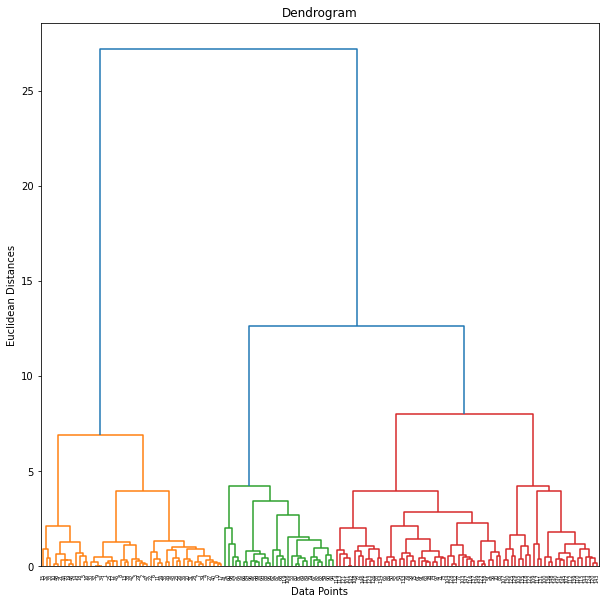

In [22]:
plt.figure(figsize=(10,10))
merge=linkage(X,method='ward')
dendrogram(merge,color_threshold=10)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()